In [1]:
# Import the dependencies. 

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import requests
from config import weather_api_key

In [5]:
# Starting URL for the OpenWeatherMap
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [6]:
# Impor the time library and the datetime module from the datetime library

import time
from datetime import datetime 

In [2]:
# Create a set of random latitude and longitude combinations. 

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-190.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities. 

cities =[]

# Identify the nearest city for each latitude and longitude combination. 

coordinates = list(lat_lngs)

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 
    
    # If the city is unique, then we will add it to the cities list. 
    
    if city not in cities: 
        cities.append(city)
        
# Print the city count to confirm sufficient count. 

len(cities)

621

In [7]:
# Create an empty list to hold the waether data. 
city_data = []

# Print the beginning of the logging. 
print('Beginning Data Retrieval      ')
print('------------------------------')

# Create counters. 
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        



Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | niimi
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | zhezkazgan
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | dauin
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | tutoia
Processing Record 22 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 23

Processing Record 35 of Set 4 | beloha
Processing Record 36 of Set 4 | aklavik
Processing Record 37 of Set 4 | torbay
Processing Record 38 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 39 of Set 4 | yazman
Processing Record 40 of Set 4 | zhongxing
Processing Record 41 of Set 4 | angoche
Processing Record 42 of Set 4 | saint-francois
Processing Record 43 of Set 4 | la rioja
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | arvika
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | nova olinda do norte
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | ondjiva
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | port shepstone
Processing Record 4 of Set 5 | char bhadrasan
Processing Record 5 of Set 5 | jumilla
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | snyder
Proce

Processing Record 25 of Set 8 | vicuna
Processing Record 26 of Set 8 | ghatanji
Processing Record 27 of Set 8 | sobolevo
Processing Record 28 of Set 8 | okahandja
Processing Record 29 of Set 8 | egvekinot
Processing Record 30 of Set 8 | coos bay
Processing Record 31 of Set 8 | haibowan
City not found. Skipping...
Processing Record 32 of Set 8 | gazojak
Processing Record 33 of Set 8 | haimen
Processing Record 34 of Set 8 | kanevskaya
Processing Record 35 of Set 8 | cozumel
Processing Record 36 of Set 8 | alugan
Processing Record 37 of Set 8 | khonuu
City not found. Skipping...
Processing Record 38 of Set 8 | namatanai
Processing Record 39 of Set 8 | upernavik
Processing Record 40 of Set 8 | palana
Processing Record 41 of Set 8 | jacobina
Processing Record 42 of Set 8 | poum
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | xichang
Processing Record 45 of Set 8 | avera
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | srandakan
Processing 

Processing Record 13 of Set 12 | chino valley
Processing Record 14 of Set 12 | along
Processing Record 15 of Set 12 | san pedro
Processing Record 16 of Set 12 | pendleton
Processing Record 17 of Set 12 | jinchang
Processing Record 18 of Set 12 | tsuyama
Processing Record 19 of Set 12 | astoria
Processing Record 20 of Set 12 | alofi
Processing Record 21 of Set 12 | bathsheba
Processing Record 22 of Set 12 | rungata
City not found. Skipping...
Processing Record 23 of Set 12 | brae
Processing Record 24 of Set 12 | shangzhi
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | tibati
Processing Record 27 of Set 12 | acapulco
Processing Record 28 of Set 12 | zyryanka
Processing Record 29 of Set 12 | nguiu
City not found. Skipping...
Processing Record 30 of Set 12 | damphu
Processing Record 31 of Set 12 | katsuyama
Processing Record 32 of Set 12 | akdepe
Processing Record 33 of Set 12 | humaita
Processing Record 34 of Set 12 | olot
Processing Record 35 of Se

In [11]:
len(city_data)

563

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame. 

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,24.80,95,100,7.76,RU,2022-12-18 19:29:46
1,Niimi,34.9833,133.4667,27.09,88,70,10.40,JP,2022-12-18 19:29:47
2,San Quintin,30.4833,-115.9500,62.31,54,71,7.20,MX,2022-12-18 19:29:47
3,Avarua,-21.2078,-159.7750,80.65,89,20,9.22,CK,2022-12-18 19:29:48
4,Zhezkazgan,47.8043,67.7144,10.81,90,15,4.97,KZ,2022-12-18 19:29:49
5,Thompson,55.7435,-97.8558,-11.04,70,100,8.05,CA,2022-12-18 19:29:46
6,Georgetown,5.4112,100.3354,78.73,85,40,9.22,MY,2022-12-18 19:29:50
7,Barrow,71.2906,-156.7887,-9.38,77,75,10.36,US,2022-12-18 19:29:50
8,Port Hardy,50.6996,-127.4199,26.78,68,75,9.22,CA,2022-12-18 19:29:51
9,Hermanus,-34.4187,19.2345,67.80,76,100,12.95,ZA,2022-12-18 19:29:52


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-12-18 19:29:46,59.7035,30.7861,24.80,95,100,7.76
1,Niimi,JP,2022-12-18 19:29:47,34.9833,133.4667,27.09,88,70,10.40
2,San Quintin,MX,2022-12-18 19:29:47,30.4833,-115.9500,62.31,54,71,7.20
3,Avarua,CK,2022-12-18 19:29:48,-21.2078,-159.7750,80.65,89,20,9.22
4,Zhezkazgan,KZ,2022-12-18 19:29:49,47.8043,67.7144,10.81,90,15,4.97
5,Thompson,CA,2022-12-18 19:29:46,55.7435,-97.8558,-11.04,70,100,8.05
6,Georgetown,MY,2022-12-18 19:29:50,5.4112,100.3354,78.73,85,40,9.22
7,Barrow,US,2022-12-18 19:29:50,71.2906,-156.7887,-9.38,77,75,10.36
8,Port Hardy,CA,2022-12-18 19:29:51,50.6996,-127.4199,26.78,68,75,9.22
9,Hermanus,ZA,2022-12-18 19:29:52,-34.4187,19.2345,67.80,76,100,12.95


In [14]:
# Create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from teh DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

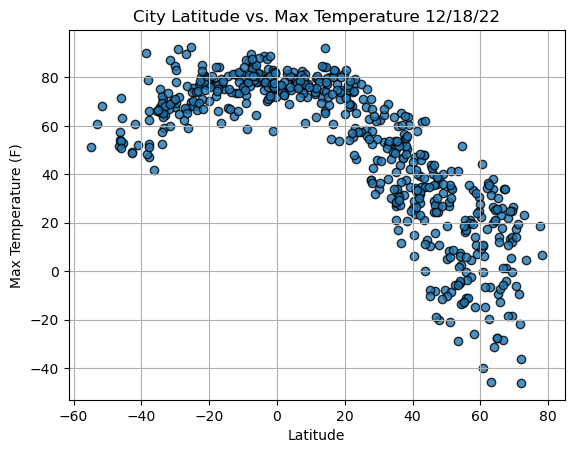

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

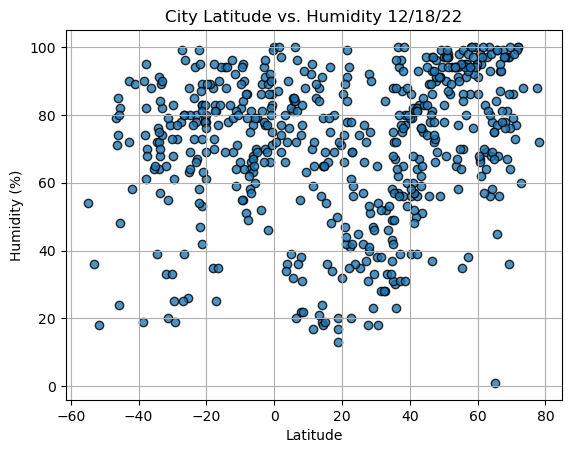

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

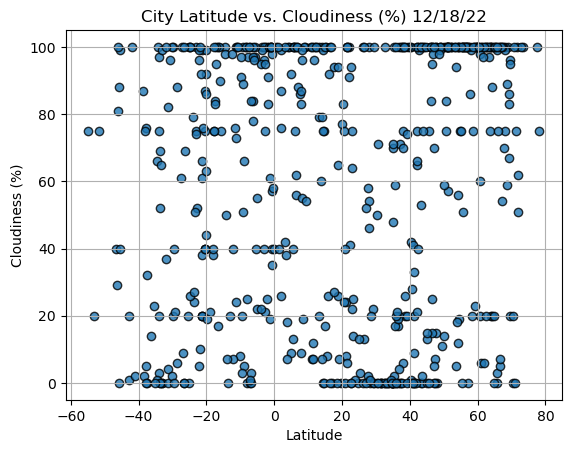

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

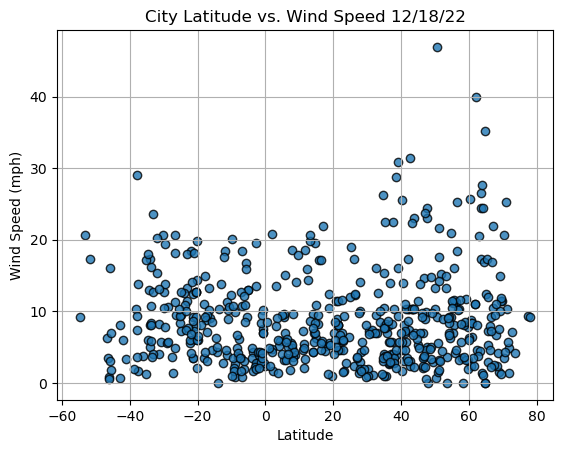

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()